# Group Project Proposal

## Introduction ## 

Heart disease is a leading cause of death worldwide, with millions of lives lost each year. The fight against this pervasive health issue increasingly leverages data analysis to identify risk factors, improve diagnostic methods, and tailor treatments more effectively. This project focuses on analyzing a heart disease dataset from the UCI Machine Learning Repository, which includes critical variables such as age, cholesterol levels, and blood pressure among others. 

"*In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is an integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).*" 

**By exploring this dataset, we aim to predict heart disease by age and cholesterol, contributing to better health outcomes.**


Source:\
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
heart_data <- read_csv("processed.cleveland.csv", col_names = FALSE) |>
select(X1, X2, X3, X4, X5, X8, X14)

colnames(heart_data) <- make.names(c("age", "sex", "pain_location", "restbps", "cholesterol", "maxbpm", "health"))
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,pain_location,restbps,cholesterol,maxbpm,health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,150,0
67,1,4,160,286,108,2
67,1,4,120,229,129,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,115,3
57,0,2,130,236,174,1
38,1,3,138,175,173,0


In [3]:
number_of_patients_by_age <- heart_data |>
group_by(age) |>
summarize(parient_count = n())
number_of_patients_by_age

age,parient_count
<dbl>,<int>
29,1
34,2
35,4
⋮,⋮
74,1
76,1
77,1


In [10]:
heart_data_split <- initial_split(heart_data, prop = 0.75, strata = health)
heart_data_training <- training(heart_data_split)
heart_data_testing <- testing(heart_data_split)


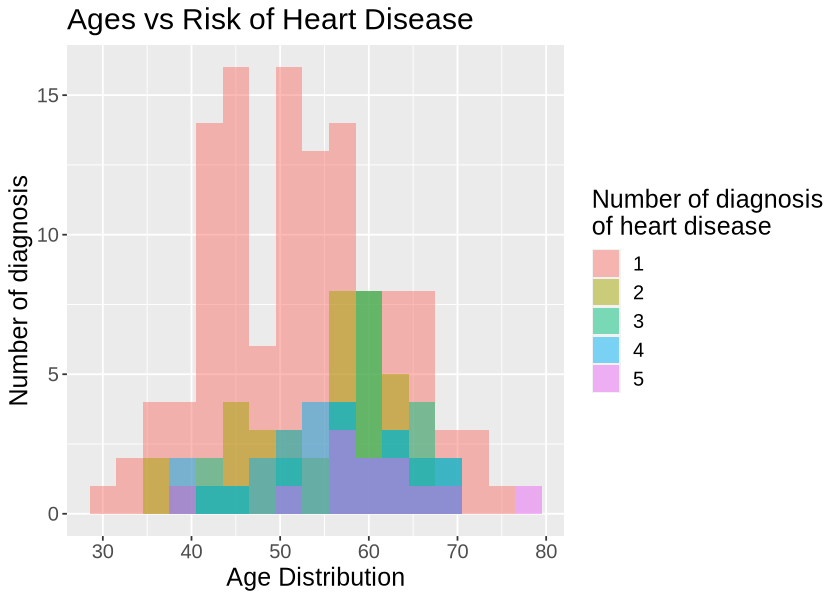

In [59]:
options(repr.plot.width = 7, repr.plot.height = 5)
plot_ages <- heart_data_training |>
ggplot(aes(x = age, fill = as_factor(health))) +
geom_histogram(na.rm = TRUE, binwidth = 3, alpha = 0.5, position = "identity") +
labs(title = "Ages vs Risk of Heart Disease", x = "Age Distribution",y = "Number of diagnosis" , fill = "Number of diagnosis \nof heart disease") +
scale_fill_discrete(labels = c("1", "2", "3", "4", "5")) +
theme(text = element_text(size = 15))

plot_ages

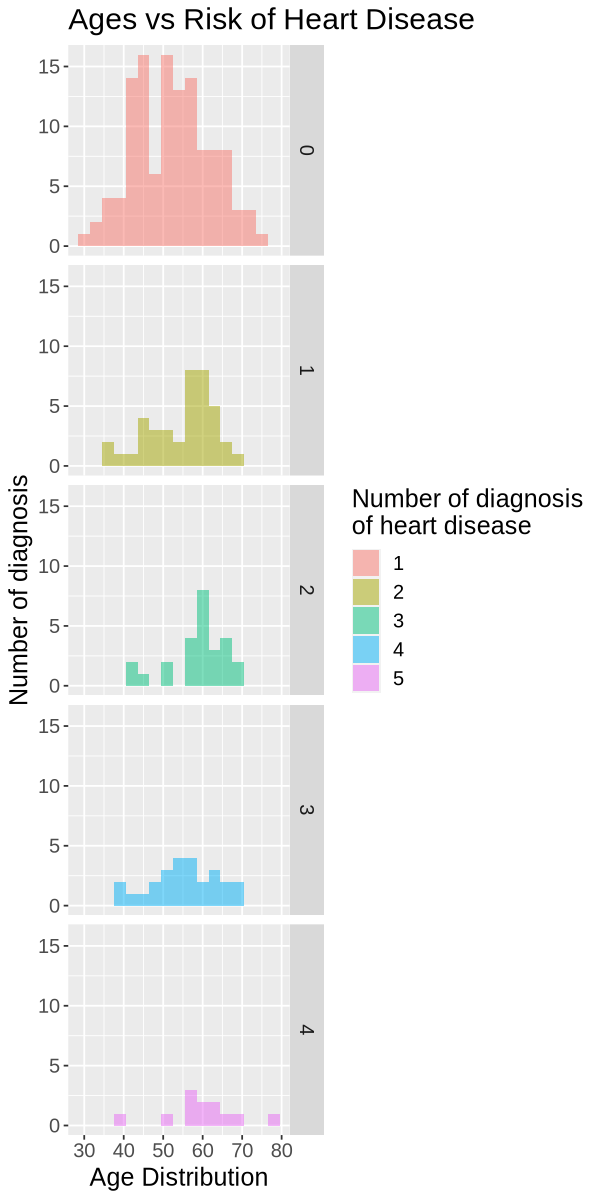

In [60]:
options(repr.plot.width = 5, repr.plot.height = 10)
plot_ages <- plot_ages + 
facet_grid(rows = vars(health))

plot_ages

Expected outcomes and significance: 

We aim to investigate the leading causes of heart diseases in Cleveland which can give us an insight on who is most at risk from this diseases based on their age, we will primarily be using the "age" and "health" variable in our research, we may later in our report consider investigating deeper in the age brackets for those at a greater risk from the disease based on their sex. Understanding the demographics most at risk can indeed provide valuable insights applicable to a broader population, potentially millions if not billions around the world. This medical research on heart diseases could help us narrow down the key factors which are responsible and develop the necessary technology, and techniques to detect this disease well in advance which may save lives of those at risk.
